# Project Title: Student Spending Habit Analyis 



## Objective

The aim of analyzing the Student Spending Habits Dataset is to leverage SQL and Python Pandas to extract and understand student financial behaviors and spending patterns. The analysis will focus on:

1. **Data Profiling**:
   - **SQL Query Objective**: Write SQL queries to profile the dataset by summarizing demographic details (e.g., average age, gender distribution) and financial characteristics (e.g., average monthly income and financial aid).
   - **Python Pandas Objective**: Perform further profiling and detailed statistical analysis using Pandas.

2. **Spending Patterns**:
   - **SQL Query Objective**: Analyze spending patterns by examining expenses across different categories and identifying trends based on year in school, major, or other demographic factors.
   - **Python Pandas Objective**: Use Pandas to conduct in-depth analysis and visualize spending patterns.

3. **Budget Analysis**:
   - **SQL Query Objective**: Evaluate how students' expenses align with their monthly income and financial aid. Determine if students' spending is within their means.
   - **Python Pandas Objective**: Perform detailed budgeting analysis and create reports on financial alignment.

4. **Payment Preferences**:
   - **SQL Query Objective**: Examine the relationship between preferred payment methods and spending behaviors.
   - **Python Pandas Objective**: Analyze payment preferences and their impact on spending using Pandas.

5. **Comparative Analysis**:
   - **SQL Query Objective**: Compare spending behaviors between different demographic groups to identify significant differences or trends.
   - **Python Pandas Objective**: Use Pandas for comparative analysis and visualization of spending behaviors across groups.

6. **Correlation and Influencing Factors**:
   - **SQL Query Objective**: Identify correlations between spending in various categories and demographic variables.
   - **Python Pandas Objective**: Perform correlation analysis and determine influencing factors using Pandas.

7. **Predictive Modeling**:
   - **SQL Query Objective**: Prepare datasets for modeling by extracting features and summaries.
   - **Python Pandas Objective**: Build and evaluate predictive models to forecast future spending behavior.

8. **Visualization Preparation**:
   - **SQL Query Objective**: Extract data needed for creating visualizations that highlight key spending trends and patterns.
   - **Python Pandas Objective**: Use Pandas for creating detailed visualizations and reports.

9. **Recommendations**:
   - **SQL Query Objective**: Generate insights from SQL queries to inform recommendations.
   - **Python Pandas Objective**: Develop actionable recommendations for students and educational institutions based on the comprehensive analysis.


In [54]:
# Import requirements
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import matplotlib.ticker as mticker



In [2]:
# load data 
student_spending_habit=pd.read_excel("Student Spending Habit Data.xlsx")
df=student_spending_habit # change data name to df for convinience
                                     

In [3]:
df.head(30) # view data

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
5,5,25,Non-binary,Sophomore,Computer Science,523,790,3151,413,386,122,131,73,38,234,108,99,Mobile Payment App
6,6,23,Female,Freshman,Engineering,1354,69,4973,812,398,101,213,21,38,157,117,48,Credit/Debit Card
7,7,23,Female,Junior,Economics,631,748,3966,571,269,92,251,37,90,152,56,62,Mobile Payment App
8,8,22,Non-binary,Senior,Computer Science,1402,248,5638,599,354,82,155,123,41,162,172,194,Credit/Debit Card
9,9,18,Female,Junior,Computer Science,1423,74,3977,626,249,117,123,51,74,243,34,196,Mobile Payment App


### Clean data 

In [4]:
df.isnull().sum() # check for null

Unnamed: 0                  0
age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

In [5]:
df.duplicated().sum() # check for duplicate data 

0

In [6]:
# change 'Unnamed: 0' to s/n
df.rename(columns={'Unnamed: 0': 's/n'}, inplace=True)


In [7]:
# transform data to add columns 
df["total income"] = df['monthly_income'] + df['financial_aid']
df["total expenses"]=df['tuition'] + df['housing'] + df['food'] + df['transportation'] + df['books_supplies'] + df['entertainment'] + df['personal_care'] + df['technology'] + df['health_wellness'] +df['miscellaneous']
df["out of pocket expenses"] =df['tuition'] + df['housing'] + df['food'] + df['transportation'] + df['books_supplies'] + df['entertainment'] + df['personal_care'] + df['technology'] + df['health_wellness'] +df['miscellaneous']-  df['financial_aid']

### Apply Descriptive Analysis on data

In [8]:
print(df.dtypes) # check for column data type

s/n                          int64
age                          int64
gender                      object
year_in_school              object
major                       object
monthly_income               int64
financial_aid                int64
tuition                      int64
housing                      int64
food                         int64
transportation               int64
books_supplies               int64
entertainment                int64
personal_care                int64
technology                   int64
health_wellness              int64
miscellaneous                int64
preferred_payment_method    object
total income                 int64
total expenses               int64
out of pocket expenses       int64
dtype: object


In [9]:
total_males = df[df['gender'] == 'Male'].shape[0]
total_females = len(df[df['gender'] == 'Female'])
total_Non_binary = len(df[df['gender'] == 'Non-binary'])


print(f'Total number of males: {total_males}')
print(f'Total number of females: {total_females}')
print(f'Total number of non_binary: {total_Non_binary}')



Total number of males: 356
Total number of females: 323
Total number of non_binary: 321


In [10]:
df.describe() # print statistics

,s/n,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,total income,total expenses,out of pocket expenses
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000,1525.421000,6315.478000,5810.70700
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221,418.348868,885.890762,928.97811
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000,560.000000,4453.000000,3643.00000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000,1227.750000,5569.500000,5061.00000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000,1520.000000,6289.000000,5812.50000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000,1843.500000,7047.250000,6573.50000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000,2495.000000,8266.000000,8186.00000


## DATA VISUALISATION TO PROVIDE MORE INSIGHTS

In [11]:
gender_expense_distribution=df.groupby('gender')['total expenses'].sum().reset_index().sort_values(by='total expenses') # group gender- expense
gender_income_distribution=df.groupby('gender')['total income'].sum().reset_index().sort_values(by='total income') # group gender- income
gender_finance_aid_distribution=df.groupby('gender')['financial_aid'].sum().reset_index().sort_values(by='financial_aid') # group gender- finance aid


In [12]:
gender_expense_distribution

,gender,total expenses
0,Female,2027986
2,Non-binary,2030127
1,Male,2257365


In [13]:
gender_income_distribution

,gender,total income
2,Non-binary,488172
0,Female,493514
1,Male,543735


In [14]:
df_gi=gender_income_distribution

In [15]:
df_ge=gender_expense_distribution # change column name for convinience

In [16]:
df_fa=gender_finance_aid_distribution # change column name for convinience
df_fa

,gender,financial_aid
2,Non-binary,157320
0,Female,162656
1,Male,184795


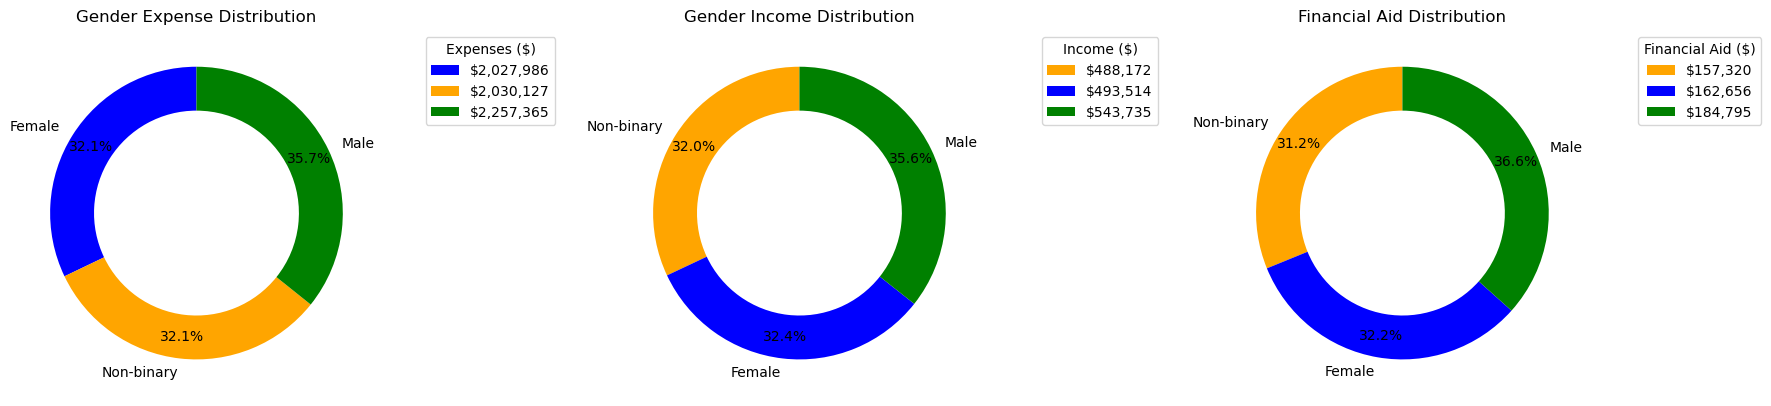

In [17]:
# Create figure and axes (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
colors = {'Male': 'green', 'Female': 'blue', 'Non-binary': 'orange'}

# Plot the first donut chart for expenses
wedges1, texts1, autotexts1 = ax1.pie(df_ge['total expenses'], 
                                       labels=df_ge['gender'],
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       pctdistance=0.85,
                                       colors=[colors[gender] for gender in df_ge['gender']],
                                       wedgeprops=dict(width=0.3))

# Plot the second donut chart for income
wedges2, texts2, autotexts2 = ax2.pie(df_gi['total income'], 
                                       labels=df_gi['gender'],
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       pctdistance=0.85,
                                       colors=[colors[gender] for gender in df_gi['gender']],
                                       wedgeprops=dict(width=0.3))

# Plot the third donut chart for financial aid
wedges3, texts3, autotexts3 = ax3.pie(df_fa['financial_aid'], 
                                       labels=df_fa['gender'],
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       pctdistance=0.85,
                                       colors=[colors[gender] for gender in df_fa['gender']],
                                       wedgeprops=dict(width=0.3))

# Add titles
ax1.set_title('Gender Expense Distribution')
ax2.set_title('Gender Income Distribution')
ax3.set_title('Financial Aid Distribution')

# Add legends
legend_labels_expenses = [f'${value:,.0f}' for value in df_ge['total expenses']]
legend_labels_income = [f'${value:,.0f}' for value in df_gi['total income']]
legend_labels_fa = [f'${value:,.0f}' for value in df_fa['financial_aid']]

ax1.legend(wedges1, legend_labels_expenses, title="Expenses ($)", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
ax2.legend(wedges2, legend_labels_income, title="Income ($)", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
ax3.legend(wedges3, legend_labels_fa, title="Financial Aid ($)", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout
plt.tight_layout()
plt.show()

### Donut Chart Analysis

The donut chart illustrates an equitable distribution of financial aid among the three gender categories. It highlights that the allocation of financial aid is proportional to each group's total expenses, suggesting that financial aid is distributed in line with individual financial needs.


In [18]:
major_distribution={
                     'Financial aid': df['financial_aid'],
                      'Monthly Income': df['monthly_income'],
    'Total out of pocket expenses': df['out of pocket expenses'],
                   'Major' : df['major']}


<Figure size 1400x600 with 0 Axes>

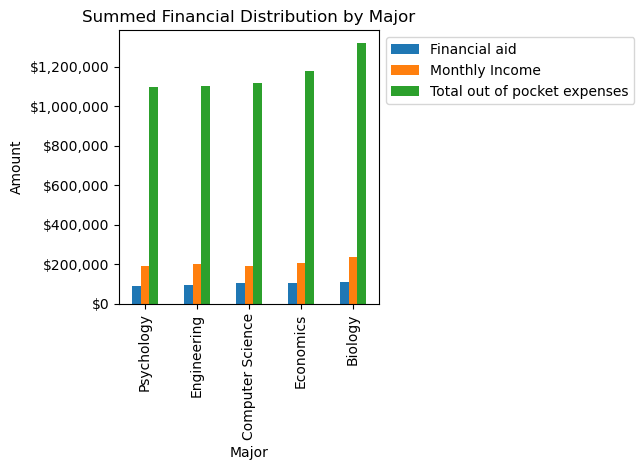

In [19]:
plt.figure(figsize=(14,6))
df_md=pd.DataFrame(major_distribution)# change column name to df_md for convinience and convert ti pandas data frame
grouped_df_md=df_md.groupby(['Major']).sum().sort_values(by="Total out of pocket expenses")
df_md.set_index('Major', inplace=True)
grouped_df_md.plot(kind='bar')
# Add labels and title
plt.xlabel('Major')
plt.ylabel('Amount')
ax = plt.gca()

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.title('Summed Financial Distribution by Major')
plt.legend(loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

### Bar Chart Analysis

The bar chart offers a detailed view of financial aid distribution across various majors. It reveals a slight upward trend in financial aid from Psychology to Biology majors, which aligns with the pattern observed in monthly income. This correlation, however, is closely linked to expenses, as both financial aid and income are proportional to the spending behavior of students. 

A significant observation is that students across all majors are spending beyond their means, indicating a broader issue of financial management. The analysis highlights that spending behavior is heavily influenced by the chosen major. An exploration of these findings further elucidates the intricate relationship between financial aid allocation, income, and expenses, providing a comprehensive understanding of student financial habits.


In [47]:
df['age'].value_counts() # identify the unique population of each group

age
25    145
24    136
22    130
23    128
18    124
21    118
20    111
19    108
Name: count, dtype: int64

In [21]:
# create a new column 'age_group' to classify ages
# Function to assign age groups
def assign_age_group(age):
    if age < 19:
        return 'Late Teens (18-19)'
    elif age < 21:
        return 'Young Adults (20-21)'
    elif age < 23:
        return 'Early Twenties (22-23)'
    elif age <= 25:
        return 'Mid Twenties (24-25)'
    else:
        return 'Out of Range'
df['age_groups'] = df['age'].apply(assign_age_group)


In [48]:
# calculate total expenses of age group without tuition
df['non_tuition_expenses']=df['total expenses'] -df['tuition']
df.head(4)

,s/n,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,...,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method,total income,total expenses,out of pocket expenses,age_groups,non_tuition_expenses
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,...,78,134,127,72,Credit/Debit Card,1228,7707,7437,Young Adults (20-21),1768
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,...,92,226,129,68,Credit/Debit Card,1881,6756,5881,Mid Twenties (24-25),1848
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,...,23,239,112,133,Cash,1662,4810,3882,Mid Twenties (24-25),1759
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,...,30,163,105,55,Mobile Payment App,882,6665,6400,Mid Twenties (24-25),1730


<Figure size 1400x2000 with 0 Axes>

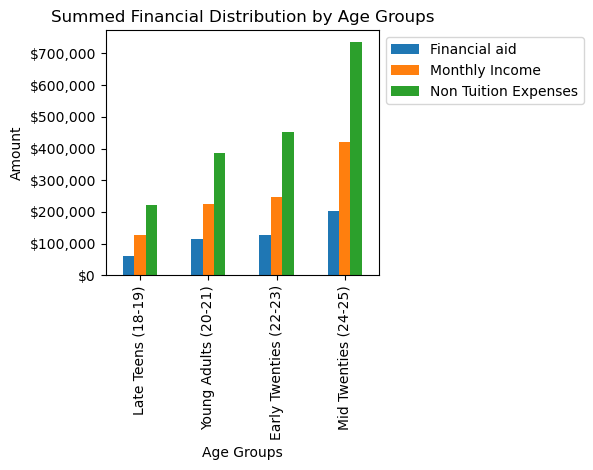

In [23]:
# create a bar chart representation of diffrent age group expenses with their financial aid and Monthly income
age_distribution={
                     'Financial aid': df['financial_aid'],
                      'Monthly Income': df['monthly_income'],
    'Non Tuition Expenses': df['non_tuition_expenses'],
                   'Age Groups' : df['age_groups']}

plt.figure(figsize=(14,20))
df_ad=pd.DataFrame(age_distribution)# change column name to df_ad for convinience and convert to a  pandas data frame
grouped_df_ad=df_ad.groupby(['Age Groups']).sum().sort_values(by="Non Tuition Expenses")
df_ad.set_index('Age Groups', inplace=True)
grouped_df_ad.plot(kind='bar')
# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Amount')
ax = plt.gca()

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.title('Summed Financial Distribution by Age Groups')
plt.legend(loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

### Bar Chart Analysis of Age Groups

In simplification, expenses are directly proportional to age groups, reflecting the increasing financial demands as students progress in their studies. This trend is also jointly proportional to financial aid and monthly income. As students age, their expenses tend to rise, which is mirrored by increases in both financial aid and income. 

This proportionality suggests that older students generally receive more financial support and have higher incomes to match their growing expenses. The bar chart underscores the interplay between age, financial aid, and income, revealing how these factors collectively influence student spending behavior. The analysis offers valuable insights into how financial resources are allocated and utilized across different stages of a student's academic journey.


<Figure size 1400x2000 with 0 Axes>

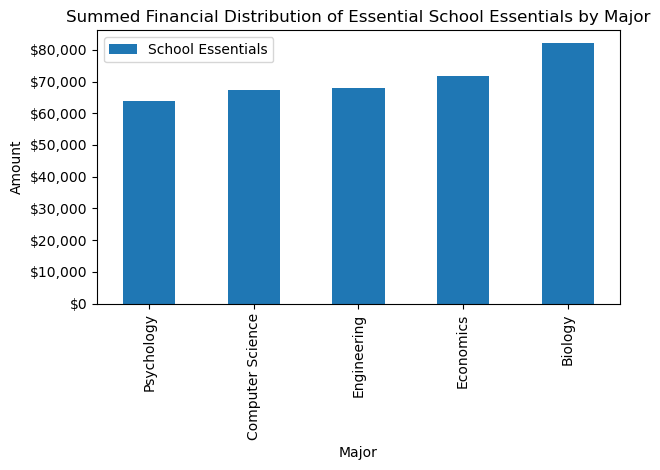

In [24]:
# Bar chart representation of major with school essentials: Book Supplies and Technology
school_essentials_distribution={
                     'School Essentials': df['books_supplies'] + df['technology'],
    'Major': df['major']}

plt.figure(figsize=(14,20))
df_sed=pd.DataFrame(school_essentials_distribution)# change column name to df_ad for convinience and convert to a  pandas data frame
grouped_df_sed=df_sed.groupby(['Major']).sum().sort_values(by="School Essentials")
df_sed.set_index('Major', inplace=True)
grouped_df_sed.plot(kind='bar')
# Add labels and title
plt.xlabel('Major')
plt.ylabel('Amount')
ax = plt.gca()

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.title('Summed Financial Distribution of Essential School Essentials by Major')
#plt.legend(loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

### Bar Chart Analysis of Expense Distribution (School Essentials: Books, Supplies, and Technology) Across Majors

Although there are no significant differences in school essentials expenses across majors, a notable similarity emerges when compared to other analyses involving total income, expenses, and financial aid. Biology and Psychology still lead in terms of expenses for school essentials. While there are slight differences in the positioning of other majors, the chart reinforces the idea that the choice of major significantly influences how income and expenses are allocated.

This observation highlights that student spending habits are closely tied to their major and income level. In essence, the major a student chooses plays a crucial role in shaping their financial behavior, including how they allocate their resources for school essentials. This insight underscores the importance of considering academic discipline when analyzing financial support and expenditure patterns.


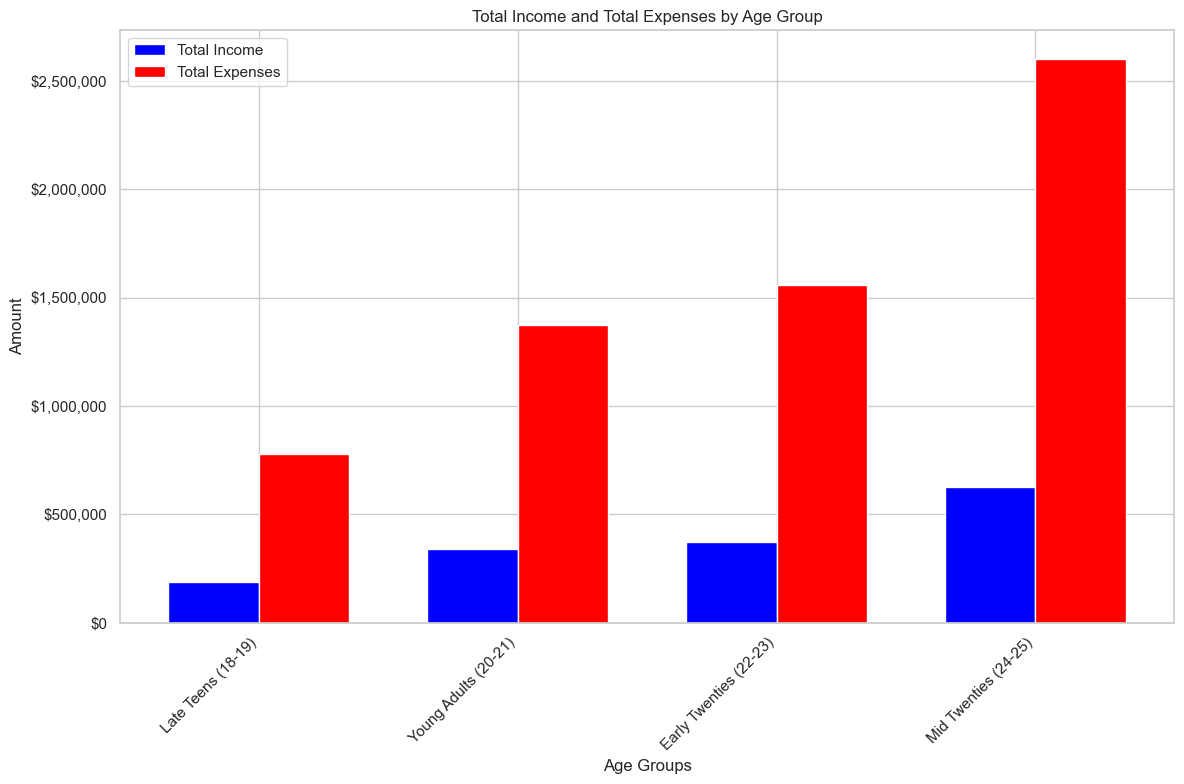

In [59]:

# Group by 'age_groups' and sum 'total income' and 'total expenses'
grouped_df = df.groupby('age_groups')[['total income', 'total expenses']].sum().reset_index().sort_values(by='total expenses')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.35
index = range(len(grouped_df))

# Plot total income
bar1 = ax.bar(index, grouped_df['total income'], bar_width, label='Total Income', color='blue')

# Plot total expenses
bar2 = ax.bar([i + bar_width for i in index], grouped_df['total expenses'], bar_width, label='Total Expenses', color='red')

# Add labels, title, and legend-
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Age Groups')
ax.set_ylabel('Amount')
ax.set_title('Total Income and Total Expenses by Age Group')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(grouped_df['age_groups'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Age Group Analysis (Further Insights)

The analysis reveals that both income and expenses increase proportionally across different age groups. This trend highlights a consistent growth pattern, where higher age groups tend to experience higher income and expenses. This proportional relationship underscores the broader financial behaviors and spending patterns that evolve as individuals age.


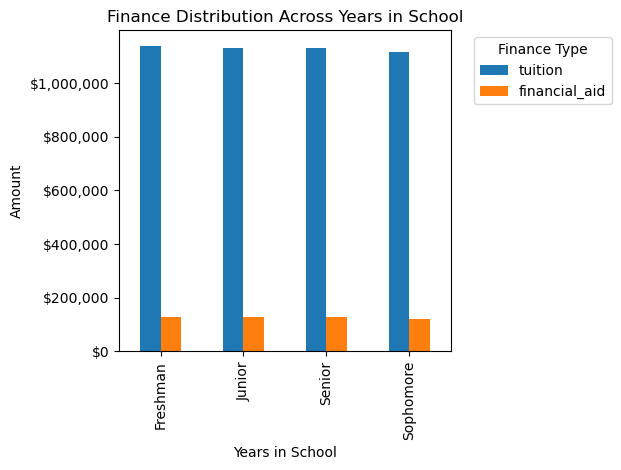

In [26]:
# Group by 'year_in_school' and sum 'tuition' and 'financial_aid'
grouped_year = df.groupby('year_in_school')[['tuition', 'financial_aid',]].sum().reset_index()

# Set 'year_in_school' as the index for plotting
grouped_year.set_index('year_in_school', inplace=True)

# Create a bar plot for 'tuition' and 'financial_aid'
ax = grouped_year.plot(kind='bar')

# Set the title and axis labels
plt.title("Finance Distribution Across Years in School")
plt.ylabel("Amount")
plt.xlabel("Years in School")

# Format the y-axis to display currency values
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Adjust the legend to a suitable position
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title="Finance Type")

# Tighten layout and show plot
plt.tight_layout()
plt.show()

### Years in School Chart Analysis

The analysis of tuition and financial aid across different years in school shows that they remain relatively consistent. This observation is crucial because tuition represents a significant portion of overall expenses. The data indicates that the year in school does not substantially impact expenses,


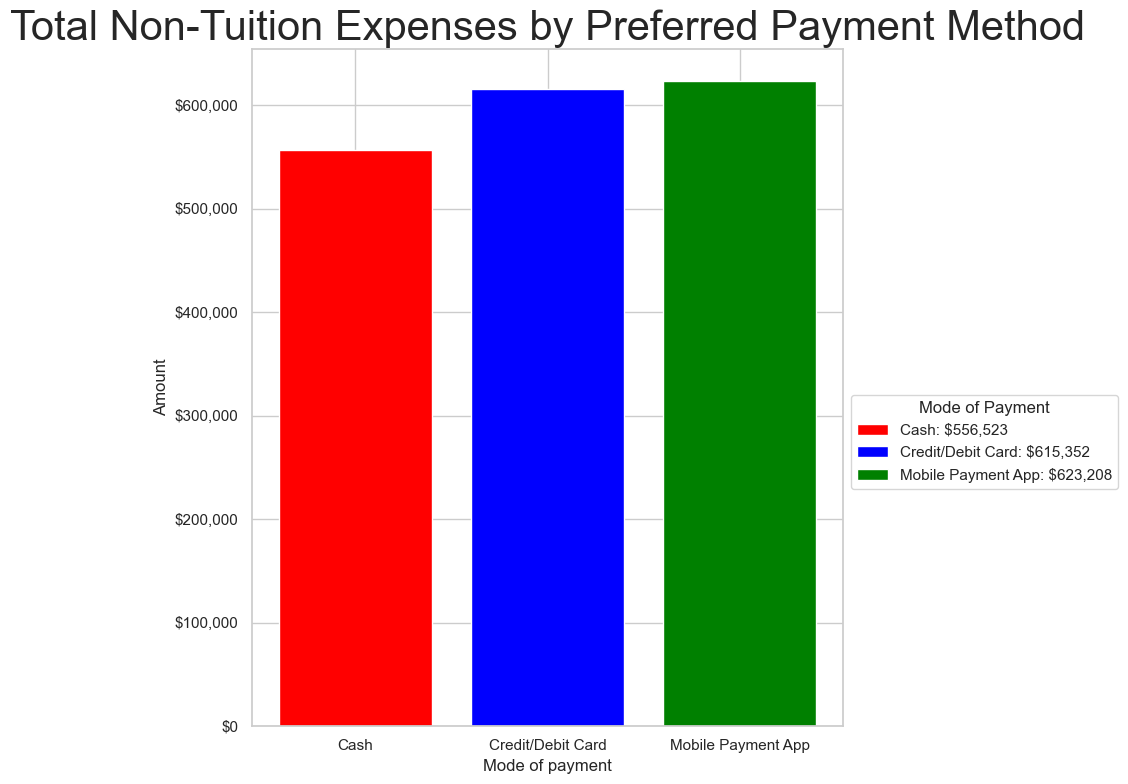

In [61]:
grouped_payment=df.groupby("preferred_payment_method")["non_tuition_expenses"].sum().reset_index().sort_values(by="non_tuition_expenses")
plt.figure(figsize=(10, 8))
bars=plt.bar(grouped_payment["preferred_payment_method"], grouped_payment['non_tuition_expenses'], color=['red', 'blue', 'green'])
label=["cash", 'credit/debit card', 'Mobile Payment']
plt.xlabel("Mode of payment")
plt.ylabel("Amount")
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.title("Total Non-Tuition Expenses by Preferred Payment Method", fontsize=30)

#label = ["Cash", "Credit/Debit Card", "Mobile Payment"]
label = [f'{method}: ${amount:,.0f}' for method, amount in zip(grouped_payment["preferred_payment_method"], grouped_payment["non_tuition_expenses"])]

plt.legend(bars, label, loc='best', bbox_to_anchor=(1, 0.5), title='Mode of Payment')
plt.tight_layout()
plt.show()


### Preferred Payment Bar Chart Analysis

From the analysis of the preferred payment methods, it is observed that there is minimal influence of students' chosen payment method on their expenses. The data reveals no significant differences in expenses across different payment methods (cash, credit/debit card, and mobile payment app). Although non-cash payment methods account for the highest expenses, this distinction does not show a notable impact on overall spending behavior.


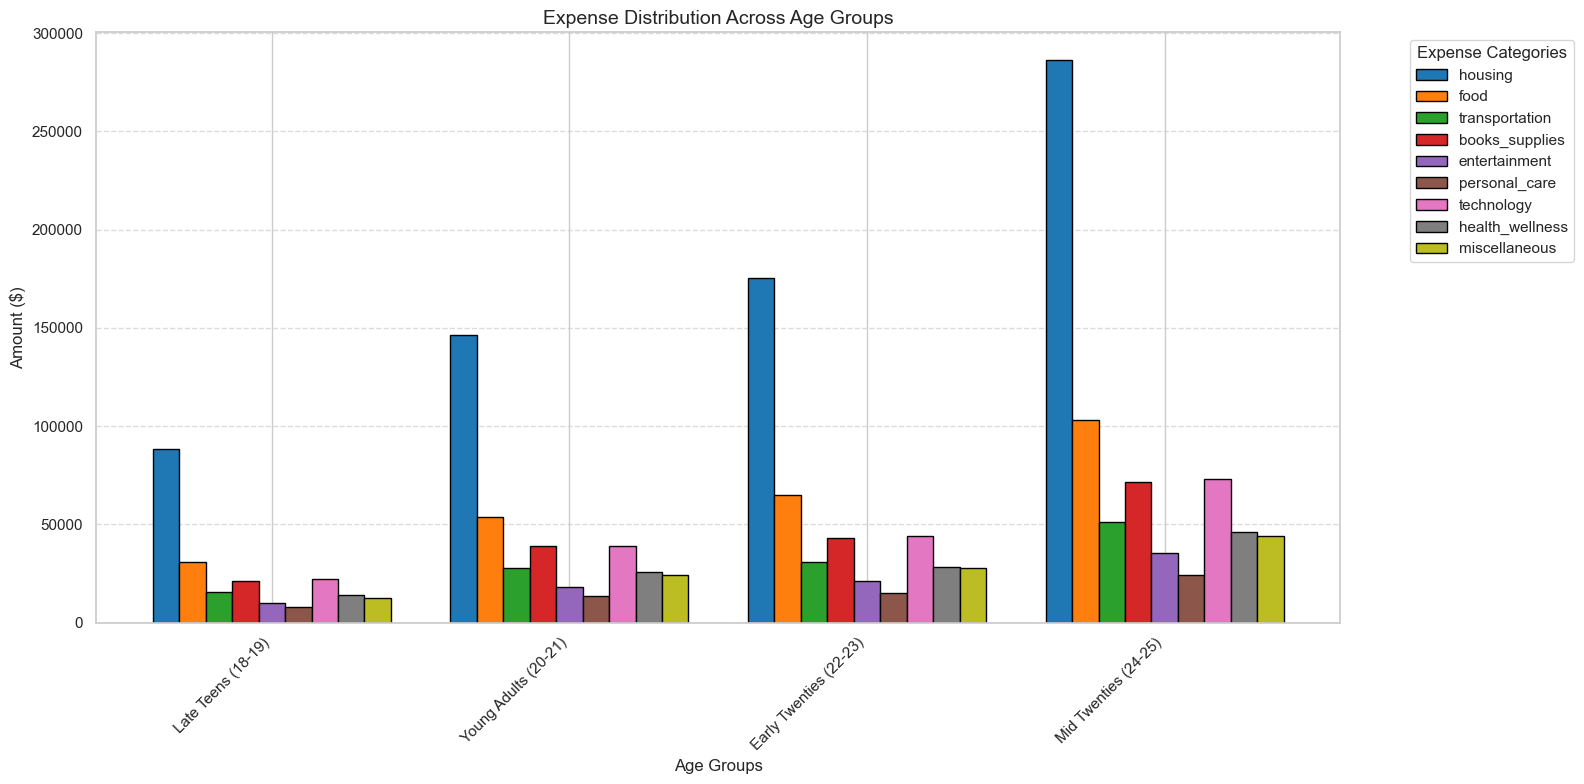

In [57]:


# Aggregating data by age groups
age_group_expenses = df.groupby('age_groups')[['housing', 'food', 'transportation',
                                               'books_supplies', 'entertainment',
                                               'personal_care', 'technology',
                                               'health_wellness', 'miscellaneous']].sum().reset_index().sort_values(by='housing')

# Set the figure size and plot style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Define the bar width and positions
bar_width = 0.8 / len(['housing', 'food', 'transportation',
                       'books_supplies', 'entertainment',
                       'personal_care', 'technology',
                       'health_wellness', 'miscellaneous'])
age_groups = age_group_expenses['age_groups']
positions = list(range(len(age_groups)))

# Define colors for each expense category
colors = sns.color_palette("tab10", len(['housing', 'food', 'transportation',
                                         'books_supplies', 'entertainment',
                                         'personal_care', 'technology',
                                         'health_wellness', 'miscellaneous']))

# Plot each expense category
for i, column in enumerate(['housing', 'food', 'transportation',
                             'books_supplies', 'entertainment',
                             'personal_care', 'technology',
                             'health_wellness', 'miscellaneous']):
    plt.bar([p + bar_width * i for p in positions],
            age_group_expenses[column],
            width=bar_width,
            color=colors[i],
            edgecolor='black',
            label=column)

# Adding labels and title
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Expense Distribution Across Age Groups', fontsize=14)
plt.xticks([p + bar_width * (len(['housing', 'food', 'transportation',
                                  'books_supplies', 'entertainment',
                                  'personal_care', 'technology',
                                  'health_wellness', 'miscellaneous']) / 2 - 0.5) for p in positions], age_groups, rotation=45, ha='right')
plt.legend(title='Expense Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding gridlines and layout adjustments
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Further Age Group Analysis

To provide a deeper understanding of how age groups relate to student expenses and majors, I conducted a thorough examination of all non-tuition expenses. This detailed analysis supports the conclusion that age groups have a significant impact on student spending behaviors.

The investigation reveals that each category of non-tuition expenses increases proportionally across different age groups. This trend underscores a clear relationship between age and spending, suggesting that as students age, their non-tuition expenses rise in tandem. Additionally, this proportional increase in expenses further highlights the influence of age on financial behavior.

This comprehensive analysis reinforces the idea that age plays a critical role in shaping student spending patterns, alongside the influence of their chosen major. By examining the proportional increase in non-tuition expenses, we gain valuable insights into how financial needs evolve with age, offering a more nuanced understanding of student financial management.


## Comprehensive Analysis of Student Spending Habits

### Overview of Observations

Through our series of chart analyses and insights, we have examined various aspects of student spending habits, including:

1. **Expense Distribution by Major**: The analysis revealed that financial aid allocation is closely tied to the major, with Biology and Psychology majors exhibiting slightly higher financial aid and expenses. This correlation underscores the role of major in influencing both income and expenditure patterns. Additionally, students across all majors tend to spend beyond their means.

2. **Age Group Spending Patterns**: We observed that expenses increase proportionally across different age groups. This finding suggests that as students age, their non-tuition expenses rise consistently. This trend aligns with the idea that age plays a significant role in shaping spending behavior.

3. **Expense Distribution Across Major for School Essentials**: The analysis of expenses on school essentials such as books, supplies, and technology revealed minor variations between majors. Biology and Psychology majors again showed higher expenses, indicating that the major influences how students allocate their resources for essential items.

4. **Tuition and Financial Aid Analysis by Year in School**: Our findings indicated that tuition and financial aid levels remain relatively consistent across different years in school. This stability suggests that year in school does not significantly impact the overall expenses, aligning with the observation that age groups are distributed across years in school.

5. **Preferred Payment Methods**: The analysis of preferred payment methods showed minimal influence on student expenses, with no significant differences across cash, credit/debit cards, and mobile payments. Despite non-cash payments being the highest, the impact on total expenses was negligible.

### Recommendations

Based on the insights from the analysis, the following recommendations can be made:

1. **Financial Planning and Budgeting**: Students should be encouraged to develop comprehensive financial plans and budgets that account for their spending habits and major-specific expenses. Educational institutions could offer workshops on financial literacy to help students manage their finances more effectively.

2. **Targeted Financial Aid**: Financial aid programs should consider major-specific and age-related factors when allocating funds. Tailoring financial aid packages to reflect the unique needs of different majors and age groups could provide more equitable support.

3. **Expense Tracking Tools**: Implementing tools for tracking and analyzing spending can help students better understand their financial habits. Institutions could develop or recommend apps that categorize expenses and offer insights into spending patterns.

4. **Review Payment Preferences**: Even though payment methods had minimal impact on expenses, understanding student preferences can help institutions and financial service providers offer more convenient and cost-effective payment solutions.

### Improvements for Future Analysis

To enhance the analysis and provide deeper insights, the following improvements could be considered:

1. **Expanded Data Categories**: Incorporating additional data categories and variables could provide a more comprehensive view of student expenses. For example, including data on part-time vs. full-time status or employment could reveal more nuanced spending patterns.

2. **Longitudinal Analysis**: Conducting longitudinal studies to track changes in student expenses over time could offer insights into how spending behaviors evolve throughout a student's academic career.

3. **Segmentation Analysis**: Performing segmentation analysis based on factors such as geographic location, academic performance, or extracurricular activities could uncover additional trends and correlations.

4. **Qualitative Insights**: Complementing quantitative analysis with qualitative research, such as surveys or interviews, could provide deeper understanding of the reasons behind spending habits and preferences.

By integrating these recommendations and improvements, future analyses can offer more actionable insights and better support the financial well-being of students.
